# Future Alaatus

## 1. Importação das bibliotecas e dos dados

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [61]:
# Importa o dataframe
df = pd.read_parquet("dados_balao.parquet")

# Apresenta o dataframe
display(df.sample(3))

,caminho_imagem,nome_imagem,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao
23,c:\Users\AriosvaldoBarros\Desktop\future_alaat...,20241201_164200.jpg,6,917,1,386231.0,1,230333.0,172.244743
103,c:\Users\AriosvaldoBarros\Desktop\future_alaat...,20241202_045602.jpg,21,1788,1,839284.0,2,329397.5,261.724064
18,c:\Users\AriosvaldoBarros\Desktop\future_alaat...,20241201_162945.jpg,4,535,1,2670339.0,2,2235130.0,122.720925


## 2. Observação das principais métricas estatísticas dos dados

In [62]:
# Apresenta as estatísticas gerais do dataframe
df.describe().round(decimals = 2)

,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao
count,177.00,177.00,177.00,177.00,177.00,177.00,177.00
mean,17.89,1368.48,0.99,1539727.11,1.29,693655.99,inf
std,9.79,944.73,0.11,1466228.04,0.81,697442.34,NaN
min,1.00,59.00,0.00,0.00,0.00,0.00,0.00
25%,10.00,675.00,1.00,433891.00,1.00,183191.00,138.72
50%,18.00,1170.00,1.00,919137.00,2.00,464968.50,220.57
75%,27.00,1813.00,1.00,2168654.00,2.00,1037780.00,405.29
max,34.00,3948.00,1.00,6361092.00,2.00,2763285.00,inf


Realiza uma filtragem dos dados

In [63]:
# Remove as linhas que possuem a área do balão igual à zero ou infinito
df = df[(df["cm2_balao"] != 0) & (df["cm2_balao"] != float("inf"))].reset_index(drop = True)

# Remove algumas colunas irrelevantes
df.drop(columns = ["caminho_imagem", "nome_imagem"], inplace = True)

# Apresenta as estatísticas gerais do dataframe
df.describe().round(decimals = 2)

,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao
count,136.00,136.00,136.0,136.00,136.00,136.00,136.00
mean,16.54,1264.21,1.0,1636969.07,1.65,896007.57,199.41
std,9.25,880.00,0.0,1423456.99,0.48,672565.98,102.85
min,1.00,59.00,1.0,150781.00,1.00,142775.00,26.20
25%,9.00,664.75,1.0,657378.50,1.00,386776.62,130.14
50%,16.00,1046.00,1.0,972351.00,2.00,638487.00,174.69
75%,24.00,1736.00,1.0,2170713.00,2.00,1243894.88,261.73
max,34.00,3948.00,1.0,6361092.00,2.00,2763285.00,552.21


## 3. Considerando que os dados apresentam o seguinte comportamento

$$

\begin{array}{c}

    \Large \textrm{peso} = a(\textrm{área}) + b

\end{array}

$$

Onde:
* `peso` é o valor previsto do peso da bexiga em gramas,
* `área` é a área em cm^2 da bexiga extraída através da imagem,
* `a` e `b` são pesos que o modelo deverá encontrar para reduzir o erro.

Treina o modelo de previsão do peso

In [70]:
# Obtendo a matriz de projeto e o vetor de rótulos, respectivamente
X = df["cm2_balao"].to_numpy()
y = df["peso_gramas"].to_numpy()

# Cria a instância da Regressão Linear do scikit-learn
model = LinearRegression()

# Treina o modelo
model.fit(X = X.reshape(-1, 1), y = y)

LinearRegression()

Apresenta o gráfico

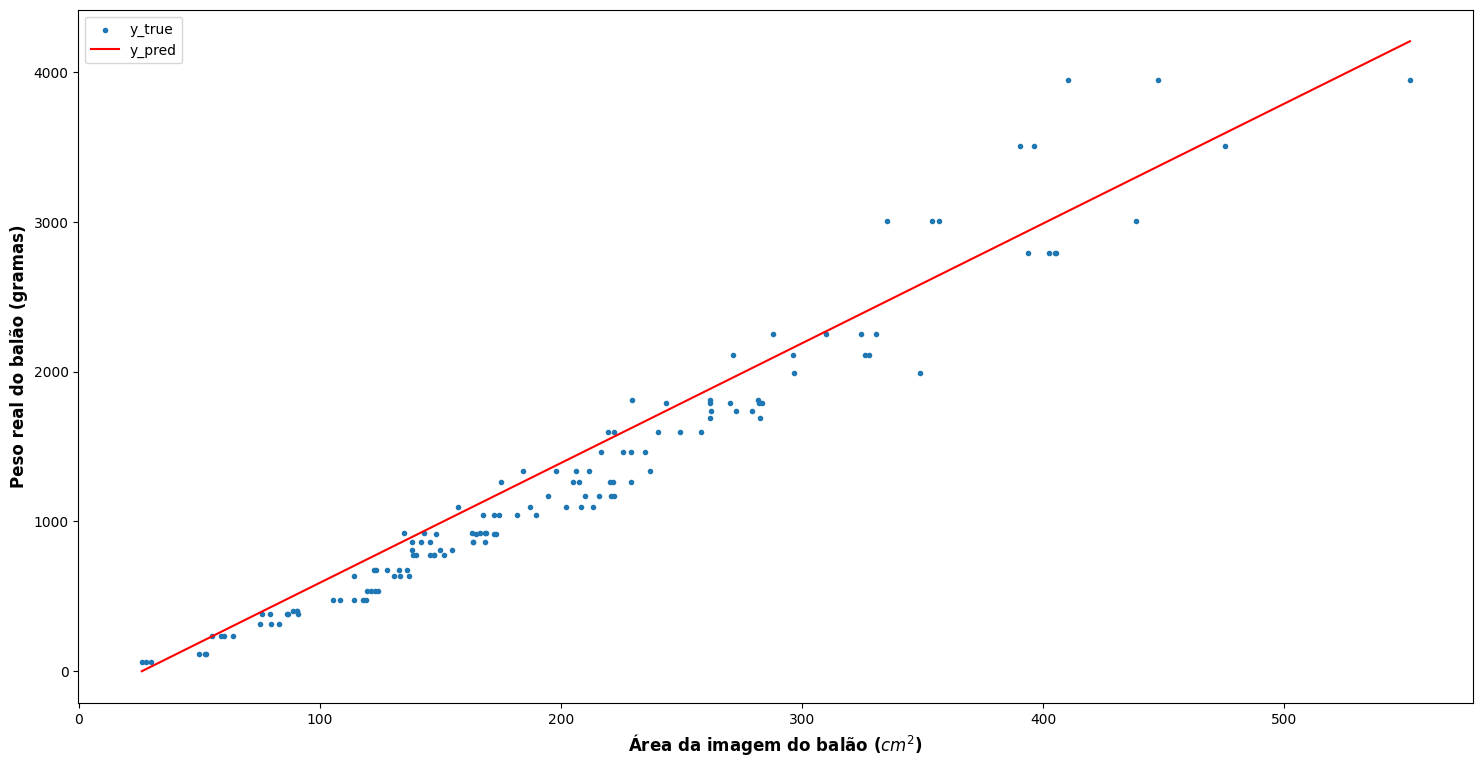

In [ ]:
# Obtém o valor mínimo e máximo de X
x_min, x_max = X.min(), X.max()

# Obtém o valor mínimo e máximo dos valores previstos
y_pred_min, y_pred_max = model.predict(x_min.reshape(-1, 1)), model.predict(x_max.reshape(-1, 1))

# Impede que o modelo forneça valores negativos
y_pred_min = np.clip(a = y_pred_min, a_min = 0, a_max = float("inf"))

# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Cria os pontos representando os dados originais
plt.scatter(x = X, y = y, marker = ".", label = "y_true")

# Cria uma reta representando a previsão do modelo
plt.plot([x_min, x_max], [y_pred_min, y_pred_max], color = "r", label = "y_pred")

# Define as legendas para os eixos x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

# Apresenta as legenda
plt.legend()

plt.show()

Apresenta as principais métricas de desempenho do modelo

In [96]:
# Define o vetor de rótulos real e o previsto
y_true = y
y_pred = model.predict(X.reshape(-1, 1))

# Impede que o modelo gere valores negativos
y_pred = np.clip(a = y_pred, a_min = 0, a_max = float("inf"))

# Apresenta as principais métricas de desempenho
print("R2:", r2_score(y_true, y_pred).round(decimals = 3))
print("Erro médio absoluto:", mean_absolute_error(y_true, y_pred).round(decimals = 3))
print("Erro percentual absoluto médio:", (mean_absolute_percentage_error(y_true, y_pred) * 100).round(decimals = 3))

R2: 0.95
Erro médio absoluto: 135.857
Erro percentual absoluto médio: 15.453


Cria novas colunas no dataframe

In [97]:
# Cria uma cópia do dataframe original
df_regressao_linear = df.copy()

# Cria uma coluna sendo o valor previsto
df_regressao_linear["y_pred"] = np.clip(a = model.predict(X = X.reshape(-1, 1)), a_min = 0, a_max = float("inf"))

# Cria uma coluna sendo a diferença do valor predito para o real
df_regressao_linear["diff_true_pred"] = df_regressao_linear["y_pred"] - df_regressao_linear["peso_gramas"]

# Obtém o erro percentual absoluto
df_regressao_linear["erro_percentual_absoluto"] = (np.abs(df_regressao_linear["diff_true_pred"]) / df_regressao_linear["peso_gramas"]) * 100

# Deixa apenas duas casas decimais
df_regressao_linear = df_regressao_linear.round(decimals = 2)

In [98]:
# Cria um dataframe contendo os percentis das colunas numéricas do dataframe
df_percentis = df_regressao_linear.quantile(q = [i/20 for i in range(21)]).round(decimals = 1).sort_index(ascending = False)

# Deixa o índice na escala de 0 a 100
df_percentis.index = df_percentis.index * 100

# Apresenta o dataframe com os percentis
display(df_percentis)

,id,peso_gramas,segmentacoes_bexiga,media_pixels_bexiga,segmentacoes_celular,media_pixels_celular,cm2_balao,y_pred,diff_true_pred,erro_percentual_absoluto
100.0,34.0,3948.0,1.0,6361092.0,2.0,2763285.0,552.2,4204.8,519.4,100.0
95.0,32.0,3003.0,1.0,4773926.0,2.0,2306598.1,403.1,2962.3,250.3,61.1
90.0,30.5,2520.5,1.0,3972116.0,2.0,2038809.2,342.0,2452.8,192.1,25.8
85.0,28.8,2109.0,1.0,3168025.2,2.0,1753000.2,296.7,2074.9,174.1,21.7
80.0,25.0,1788.0,1.0,2682167.0,2.0,1473442.5,279.4,1931.0,137.0,18.3
75.0,24.0,1736.0,1.0,2170713.0,2.0,1243894.9,261.7,1783.6,106.5,16.6
70.0,22.0,1598.0,1.0,1903264.5,2.0,1099343.8,232.1,1536.4,90.9,15.1
65.0,20.0,1334.0,1.0,1642390.2,2.0,1005413.0,221.4,1447.3,80.2,14.4
60.0,18.0,1262.0,1.0,1534753.0,2.0,869221.5,211.6,1366.2,63.7,12.7
55.0,17.0,1170.0,1.0,1177433.5,2.0,749037.8,199.1,1261.6,58.0,11.7


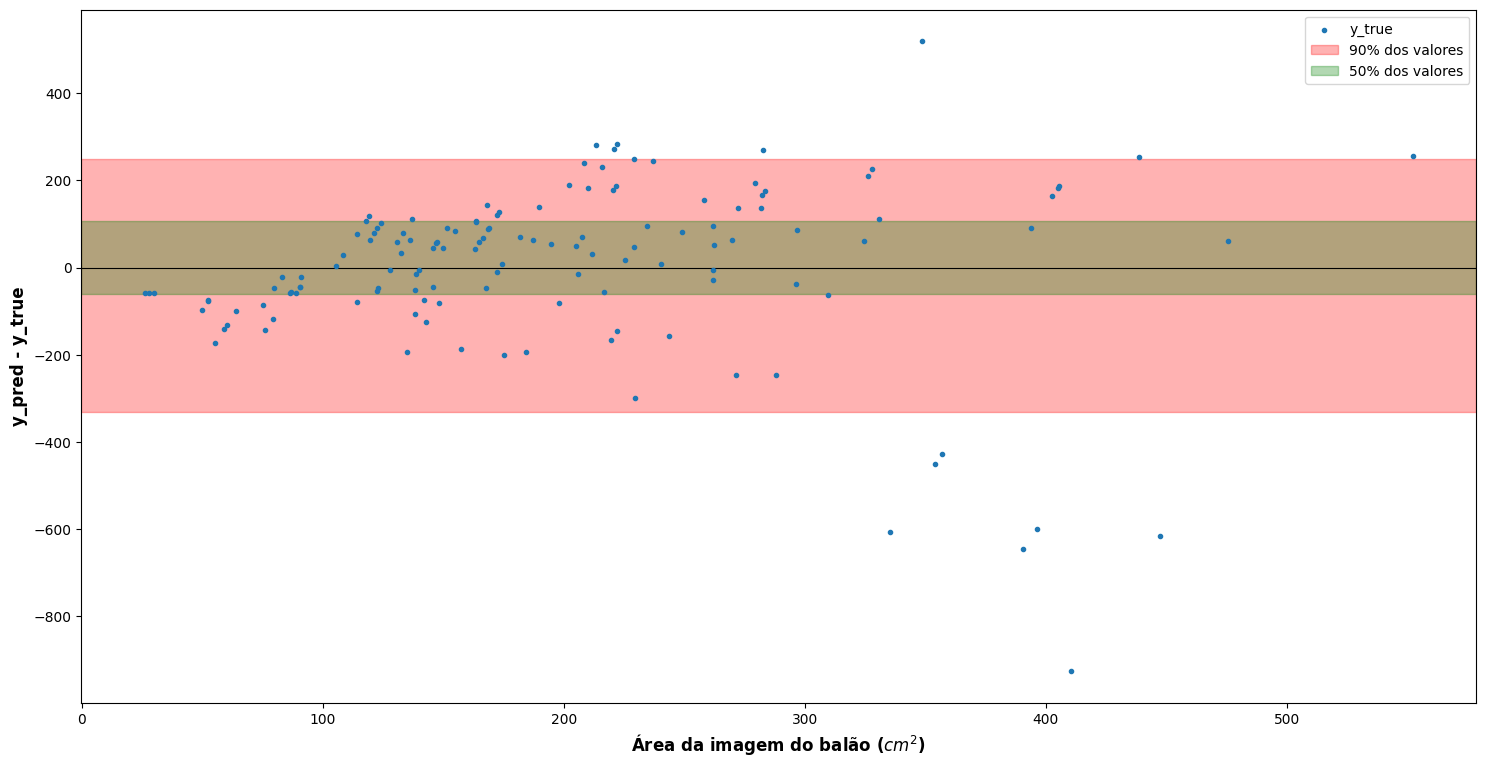

In [99]:
# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Acrescenta os dados originais
plt.scatter(x = X, y = df_regressao_linear["diff_true_pred"], marker = ".", label = "y_true", zorder = 5)

# Cria uma reta horizontal no 0
plt.axhline(y = 0, color = "k", zorder = 2, lw = 0.8)

# Define as legendas para o eixo x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "y_pred - y_true", fontsize = 12, fontweight = "bold")

# Define os percentuais mínimo e máximo
minimo = 5
maximo = 95
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = df_percentis[df_percentis.index == minimo]["diff_true_pred"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["diff_true_pred"].iloc[0], 
            alpha = 0.3, color = "r", zorder = 1, label = f"{diff}% dos valores")

# Define os percentuais mínimo e máximo
minimo = 25
maximo = 75
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = df_percentis[df_percentis.index == minimo]["diff_true_pred"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["diff_true_pred"].iloc[0], 
            alpha = 0.3, color = "g", zorder = 1, label = f"{diff}% dos valores")

# Apresenta as legendas
plt.legend()

plt.show()

O modelo está está detectando menos peso em relação ao valor real

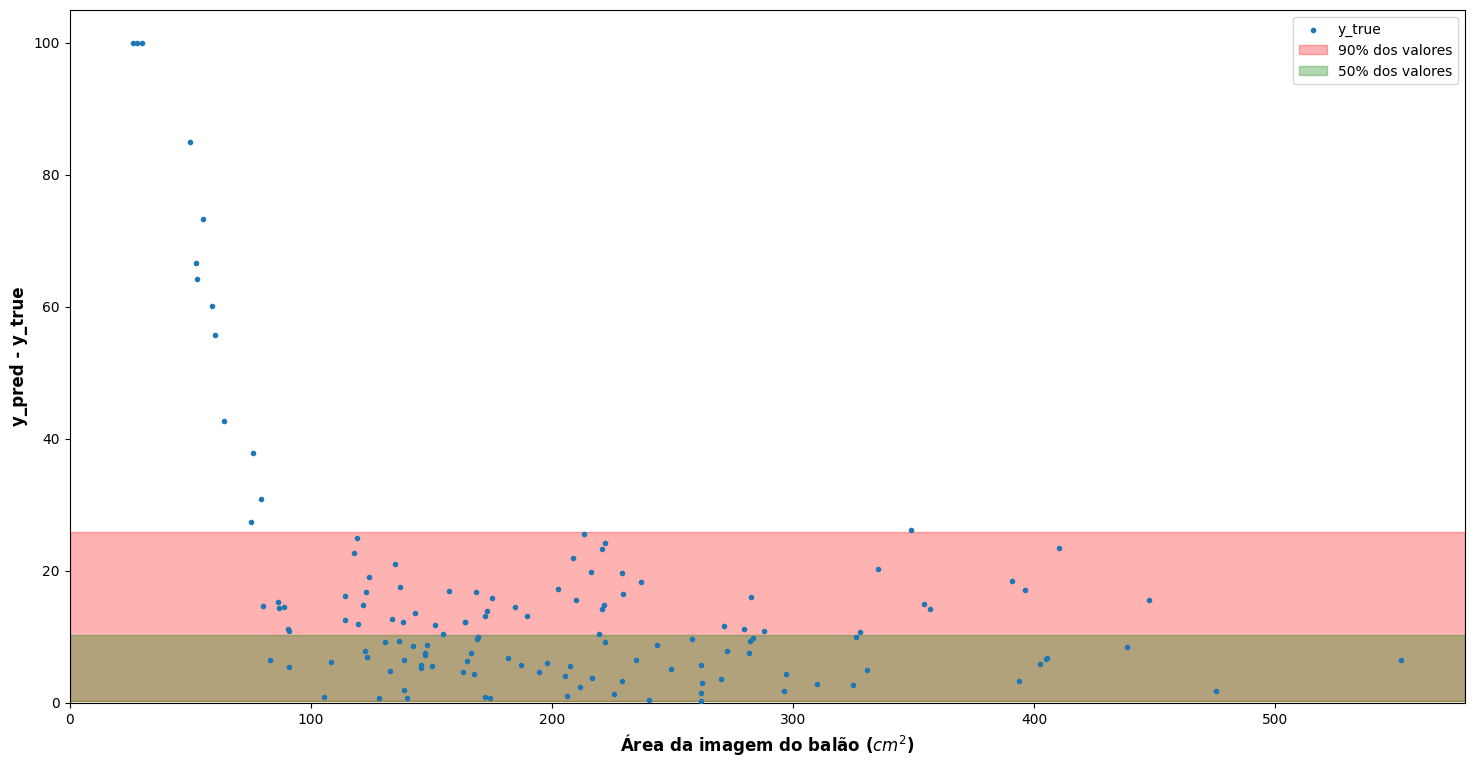

In [105]:
# Define o tamanho do gráfico
plt.figure(figsize = (18, 9))

# Acrescenta os dados originais
plt.scatter(x = X, y = df_regressao_linear["erro_percentual_absoluto"], marker = ".", label = "y_true", zorder = 5)

# Define as legendas para o eixo x e y, respectivamente
plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "y_pred - y_true", fontsize = 12, fontweight = "bold")

# Define os percentuais mínimo e máximo
minimo = 0
maximo = 90
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = df_percentis[df_percentis.index == minimo]["erro_percentual_absoluto"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["erro_percentual_absoluto"].iloc[0], 
            alpha = 0.3, color = "r", zorder = 1, label = f"{diff}% dos valores")

# Define os percentuais mínimo e máximo
minimo = 0
maximo = 50
diff = (maximo - minimo)

# Cria uma faixa horizontal
plt.axhspan(ymin = df_percentis[df_percentis.index == minimo]["erro_percentual_absoluto"].iloc[0], 
            ymax = df_percentis[df_percentis.index == maximo]["erro_percentual_absoluto"].iloc[0], 
            alpha = 0.3, color = "g", zorder = 1, label = f"{diff}% dos valores")

# Apresenta as legendas
plt.legend()

# Limita a escala do eixo y
plt.ylim(bottom = 0)

plt.show()

## 4. Considerando que os dados apresentam o seguinte comportamento

$$V = \frac{A^{\frac{3}{2}}}{6 \sqrt{\pi}}$$

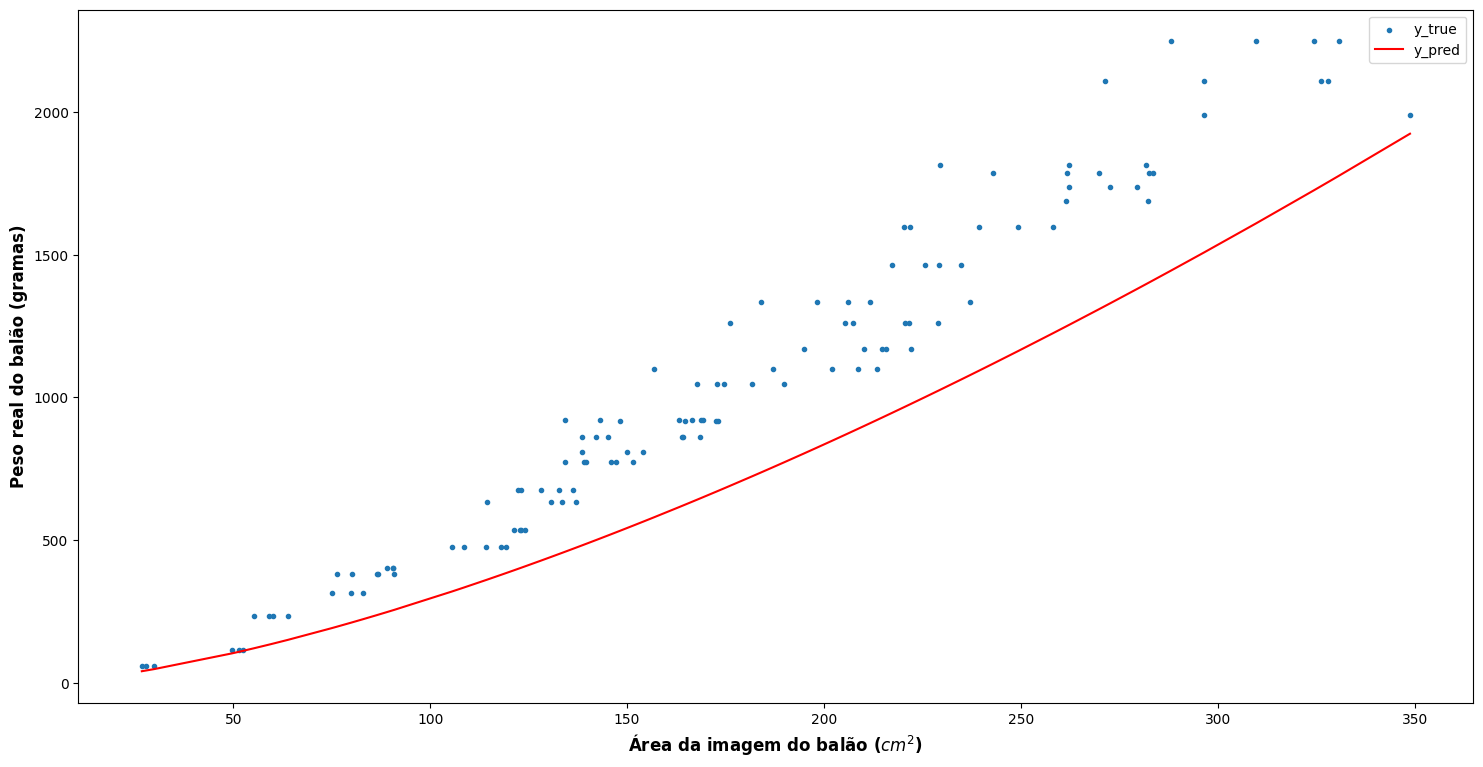

In [ ]:
X_ordenado = np.sort(a = X)
y_esfera = (X_ordenado ** (3 / 2)) / 6 * np.sqrt(np.pi)

plt.figure(figsize = (18, 9))

plt.scatter(x = X, y = y, marker = ".", label = "y_true")
plt.plot(X_ordenado, y_esfera, color = "r", label = "y_pred")

plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

plt.legend()

plt.show()

Regressão polinimial de grau 2

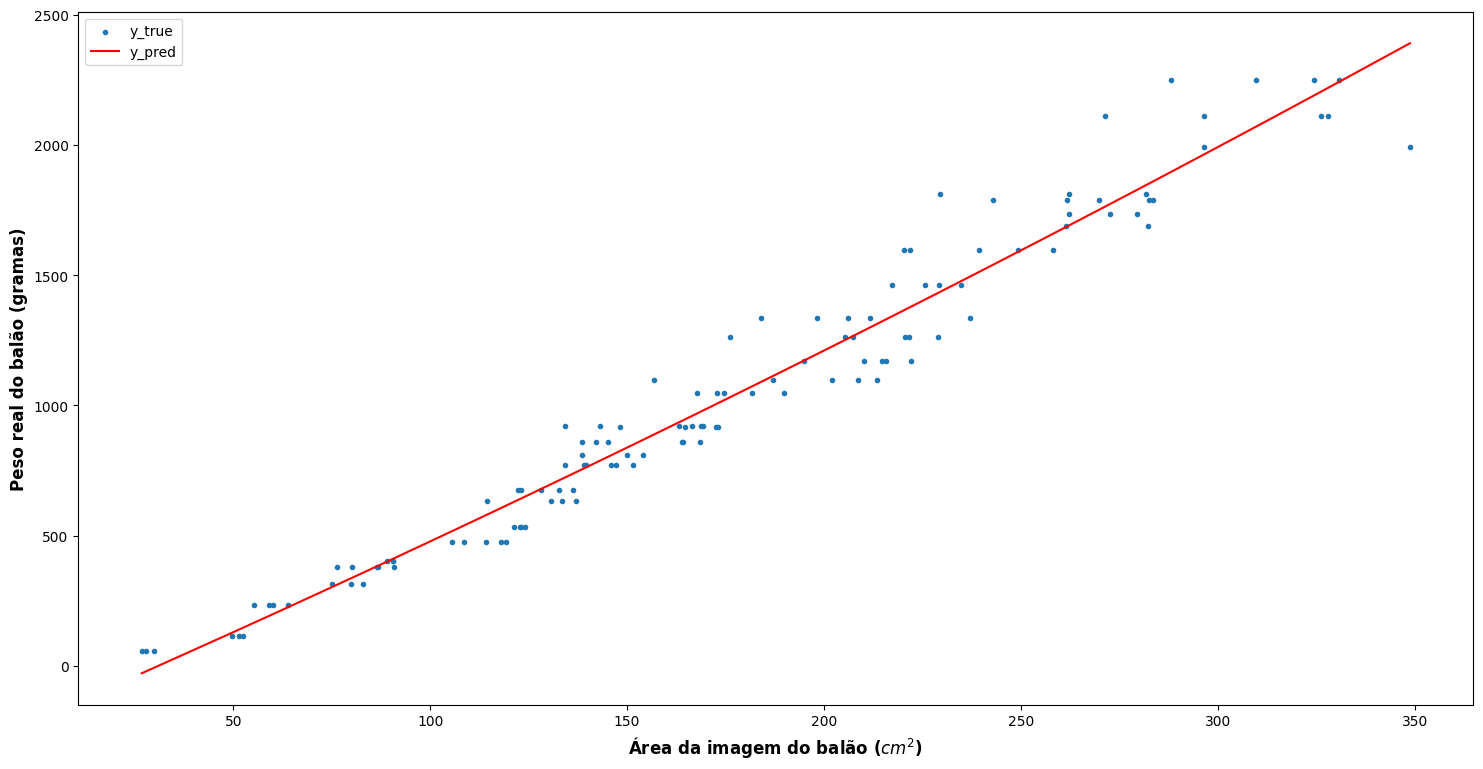

In [ ]:
X_ordenado = np.sort(a = X)

plt.figure(figsize = (18, 9))

plt.scatter(x = X, y = y, marker = ".", label = "y_true")

coef = np.polyfit(x = X, y = y, deg = 2)
pol = np.poly1d(coef)
y_pol = pol(X_ordenado)

plt.plot(X_ordenado, y_pol, color = "r", label = "y_pred")

plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

plt.legend()

plt.show()

Regressão polinimial de grau 3

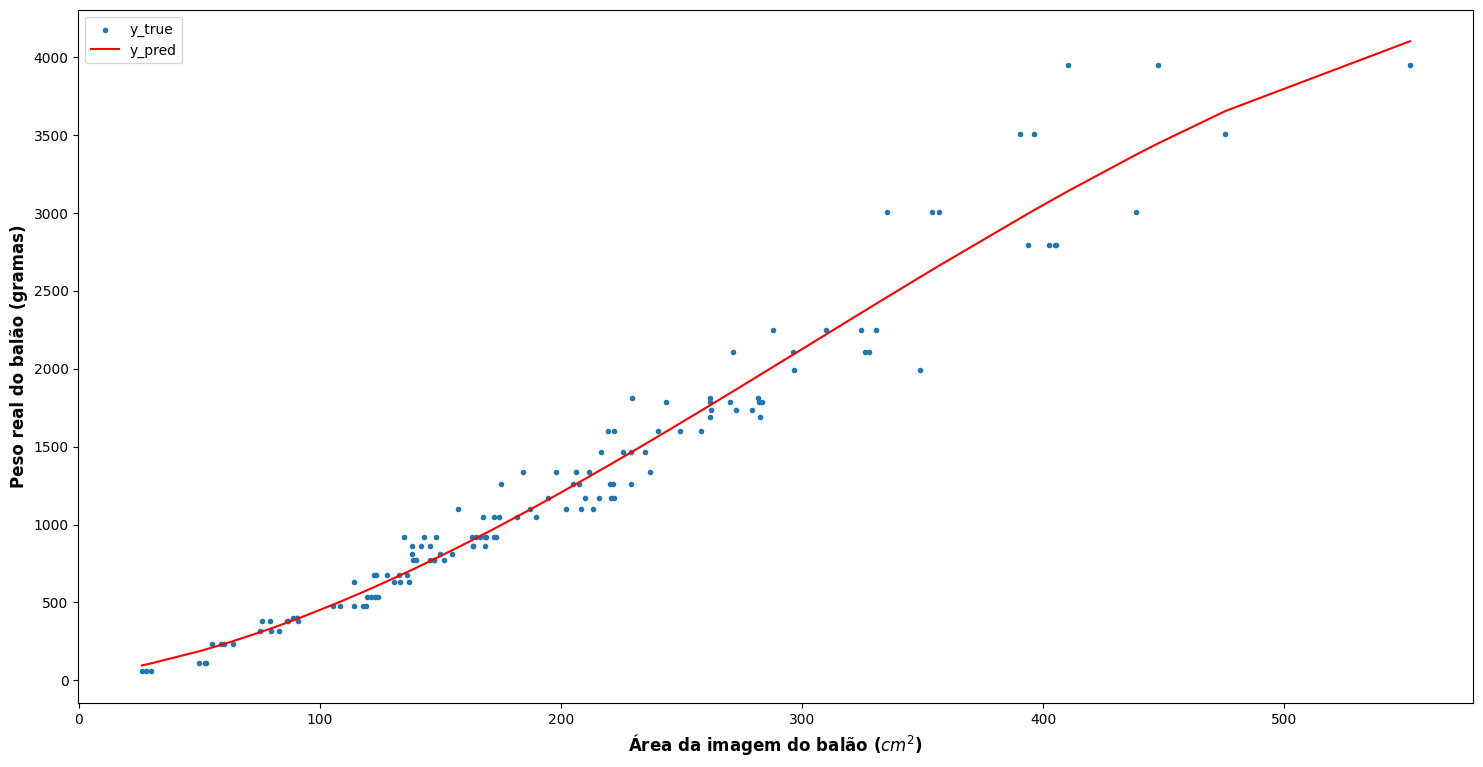

In [21]:
X_ordenado = np.sort(a = X)

plt.figure(figsize = (18, 9))

plt.scatter(x = X, y = y, marker = ".", label = "y_true")

coef = np.polyfit(x = X, y = y, deg = 3)
pol = np.poly1d(coef)
y_pol = pol(X_ordenado)

plt.plot(X_ordenado, y_pol, color = "r", label = "y_pred")

plt.xlabel(xlabel = "Área da imagem do balão ($cm^2$)", fontsize = 12, fontweight = "bold")
plt.ylabel(ylabel = "Peso real do balão (gramas)", fontsize = 12, fontweight = "bold")

plt.legend()

plt.show()

In [22]:
# Define o vetor de rótulos real e o previsto
y_true = y
y_pred = pol(X)

# Apresenta as principais métricas de desempenho
print("R2:", r2_score(y_true, y_pred).round(decimals = 3))
print("Erro médio absoluto:", mean_absolute_error(y_true, y_pred).round(decimals = 3))
print("Erro percentual absoluto médio:", (mean_absolute_percentage_error(y_true, y_pred) * 100).round(decimals = 3))

R2: 0.957
Erro médio absoluto: 122.035
Erro percentual absoluto médio: 11.531
